<a href="https://colab.research.google.com/github/absiddik7/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction

Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [38]:
path = 'https://raw.githubusercontent.com/absiddik7/Datasets/main/heart_2020_cleaned.csv'
df = pd.read_csv(path)
df_c = df.copy() # keep a copy of the df

In [39]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

##Exploratory Data Analysis

Age Category wise heart disease stats

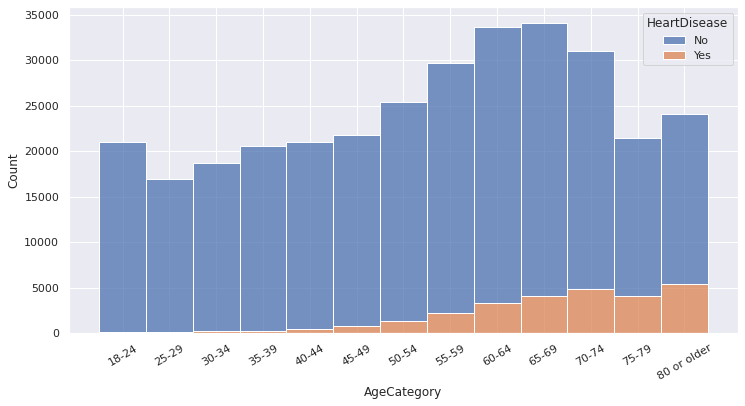

In [74]:
adata = df.sort_values(by=['AgeCategory'],ascending = True)
sns.histplot(data=adata, x="AgeCategory", hue="HeartDisease", multiple="stack")
plt.xticks(rotation=30)
plt.show()

Insights


*   People has heart disease are mostly old people




##Data Preparation

Encoding Categorical Values

In [35]:
categorical_col = df.select_dtypes(include=['object']).columns
ordEncoder = OrdinalEncoder()
df[categorical_col] = ordEncoder.fit_transform(df[categorical_col])

In [33]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
